In [352]:
# Install OpenCV
!pip install opencv-python


In [353]:
import cv2
from cv2 import Mat
import numpy as np
import matplotlib.pyplot as plt

In [354]:
image=cv2.imread("tomatos.jpg")

In [355]:
from google.colab.patches import cv2_imshow

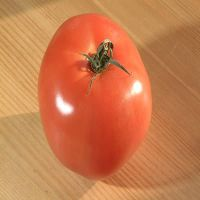

In [356]:
cv2_imshow(image)

In [357]:
hauteur, largeur, canaux = image.shape

In [358]:
print("l'hauteur est ",hauteur,"et de l'largeur est", largeur ," et canaux est",canaux ,"type de donnees",image.dtype,"size d'image",image.size )

l'hauteur est  200 et de l'largeur est 200  et canaux est 3 type de donnees uint8 size d'image 120000


In [359]:
print("le nomber de pixele est",hauteur*largeur)

le nomber de pixele est 40000


## Calculer l’histogramme de couleur de l’image en RGB (de deux manières différentes)


####a.Un vecteur de deux dimensions

In [360]:
matric=Mat(image)

In [361]:
matric_couleur_B=matric[:,:,0]
matric_couleur_G=matric[:,:,1]
matric_couleur_R=matric[:,:,2]

In [362]:
def caculate_hist(composante):
  hist=[0]*256
  for x in composante:
    for y in x:
       hist[y]+=1
  return hist

In [363]:
hist_R=caculate_hist(matric_couleur_R)
hist_G=caculate_hist(matric_couleur_G)
hist_B=caculate_hist(matric_couleur_B)

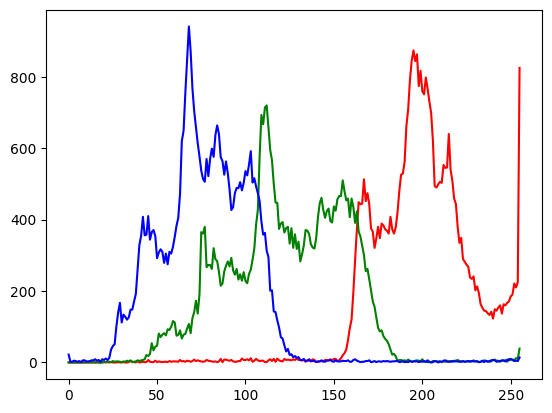

In [364]:
plt.plot(hist_R,"red")
plt.plot(hist_G,"green")
plt.plot(hist_B,"blue")
plt.show()

####b.deuxieme method


In [365]:
hist_B = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_R = cv2.calcHist([image], [2], None, [256], [0, 256])

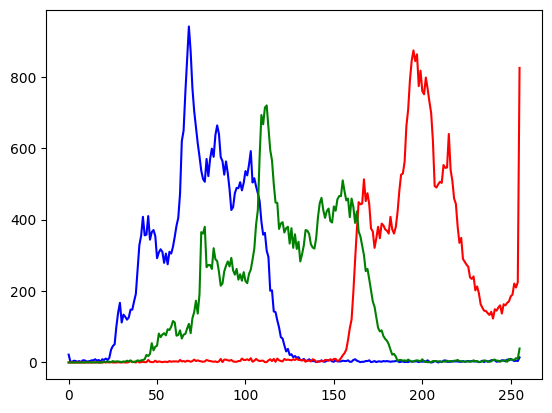

In [366]:
plt.plot(hist_B, color='b')
plt.plot(hist_R ,color='r')
plt.plot(hist_G, color='g')
plt.show()

####. Calculer la distance (tester les différentes distances) de similarité entre les images
(par histogrammes) en utilisant la fonction prédéfinie compareHist.


In [367]:
# red with green
cv2.compareHist(hist_R, hist_G, cv2.HISTCMP_BHATTACHARYYA)

0.8077275534874325

In [368]:
cv2.compareHist(hist_R, hist_B, cv2.HISTCMP_BHATTACHARYYA)

0.9086064968674809

In [369]:
# blue with green
cv2.compareHist(hist_B, hist_G, cv2.HISTCMP_BHATTACHARYYA)

0.5685022207541667

####- Calculer la moyenne de chaque composante couleur

In [370]:
image.shape[:-1]

(200, 200)

In [371]:
image[:,:,0]

array([[ 69,  75,  82, ...,  77,  76,  75],
       [ 72,  74,  78, ...,  80,  78,  77],
       [ 77,  74,  73, ...,  82,  80,  79],
       ...,
       [115, 118, 120, ...,  82,  82,  82],
       [108, 114, 121, ...,  84,  82,  80],
       [112, 111, 115, ...,  85,  82,  80]], dtype=uint8)

In [372]:
matric_couleur_B

Mat([[ 69,  75,  82, ...,  77,  76,  75],
     [ 72,  74,  78, ...,  80,  78,  77],
     [ 77,  74,  73, ...,  82,  80,  79],
     ...,
     [115, 118, 120, ...,  82,  82,  82],
     [108, 114, 121, ...,  84,  82,  80],
     [112, 111, 115, ...,  85,  82,  80]], dtype=uint8)

In [373]:
def moyenn_image(image,coleur):
  m,n=image.shape[:-1]
  return image[:,:,coleur].sum()/(n*m)

In [374]:
moyenn_image(image,0)

77.99985

In [375]:
moyenn_image(image,1)

122.996275

In [376]:
moyenn_image(image,2)

200.0049

####Convertir une image en image aux niveaux de gris :

a

In [377]:
def gray_moyenn(img):
    m = img[:,:,0] + img[:,:,1] + img[:,:,2]
    return m / 3

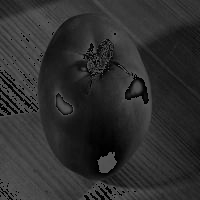

In [378]:
cv2_imshow( gray_moyenn(image))

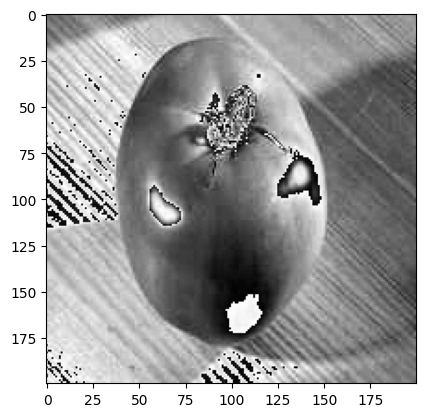

In [379]:
plt.imshow(gray_moyenn(image), cmap='gray')

b essayer la fonction prédéfinie cvtColor

In [380]:
img_en_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

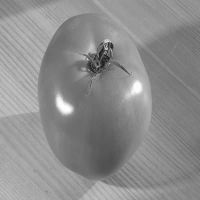

In [381]:
cv2_imshow(img_en_gris)

In [382]:
def mean_gray(img_g):
    m,n = img_g.shape
    return img_g.sum()/ (m*n)


In [383]:
mean_gra = mean_gray(gray_moyenn(image))
mean_gra

46.646208333333334

In [384]:
mean_gra1 = mean_gray(img_en_gris)
mean_gra1

140.89385

In [385]:
cv2.imwrite("./image_final.jpg", gray_moyenn(image))

True